In [5]:
from __future__ import print_function
import cantera as ct
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import prettyplotlib as ppl
from prettyplotlib import brewer2mpl
%matplotlib inline
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['font.family'] = 'Times New Roman'
colors = brewer2mpl.get_map('Set2','qualitative',8).mpl_colors

In [6]:
#define a function to calculate flame speed
def flamesp(array,comp,filename):
    p = ct.one_atm  # pressure [Pa]
    Tin = 293.15  # unburned gas temperature [K]
    width = 0.4  # 400mm
    flame_speed=[]
    for i in array:
        #set sandiego mechanism
        gas = ct.Solution(filename)
        gas.TP = Tin, p
        gas.set_equivalence_ratio(i, comp, 'O2:0.22, N2:0.78')
        #gas.mole_fraction_dict()
        f = ct.FreeFlame(gas, width=width)
        f.set_refine_criteria(ratio=3, slope=0.07, curve=0.14)
        f.solve(loglevel=0, auto=True)
        flame_speed.append(f.u[0])
    return flame_speed

In [7]:
#define a function to plot the figure
def pltfig(title,array,exp,origSD,newSD_N2H_Lind,Ma,SD_b_Ma_N,Ma_b_SD_N,SD_missingMa):
    plt.figure(figsize=(8,6))
    plt.scatter(array,exp,s = 100, marker='*',label='EXP',facecolors='none', edgecolors='red')
    plt.scatter(array,origSD,s = 100, marker='^',label='OrigSD',facecolors='none', edgecolors=colors[0])
    plt.scatter(array,newSD_N2H_Lind,s = 100, marker='^',label='NewSD',facecolors='none', edgecolors=colors[1])
    plt.scatter(array,Ma,s = 100, marker='>',label='Mathieu',facecolors='none', edgecolors=colors[2])
    plt.scatter(array,SD_b_Ma_N,s = 100, marker='s',label='SD Base Mathieu N',facecolors='none', edgecolors=colors[3])
    plt.scatter(array,Ma_b_SD_N,s = 100, marker='v',label='Mathieu Base SD N',facecolors='none', edgecolors=colors[4])
    plt.scatter(array,SD_missingMa,s = 100, marker='o',label='SD+missingMa',facecolors='none', edgecolors=colors[5])
    
    plt.legend(loc='best',framealpha=0.75,prop={'size':18})
    plt.xlabel('Equivalence Ratio $\mathregular{\phi}}$',fontsize=22)
    plt.ylabel('Flame Speed (mm/s)',fontsize=22)
    plt.xticks(fontsize = 22)
    plt.yticks(fontsize = 22)
    plt.title(title,fontsize = 22)
    plt.tight_layout()
    plt.savefig('/Users/yuanjie/Dropbox/Premix_NH3/new_SD/%s.png'%(title),dpi=600)



**** WARNING ****
For species C2H4OOH, discontinuity in cp/R detected at Tmid = 1000
	Value computed using low-temperature polynomial:  18.4211
	Value computed using high-temperature polynomial: 18.7409


**** WARNING ****
For species C2H4OOH, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  14.778
	Value computed using high-temperature polynomial: 14.7264


**** WARNING ****
For species OC2H3OOH, discontinuity in cp/R detected at Tmid = 1000
	Value computed using low-temperature polynomial:  18.7616
	Value computed using high-temperature polynomial: 19.0815


**** WARNING ****
For species OC2H3OOH, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  -18.695
	Value computed using high-temperature polynomial: -18.741


**** WARNING ****
For species CH2CH2OH, discontinuity in cp/R detected at Tmid = 1000
	Value computed using low-temperature polynomial:  15.1078
	Value computed using high-tempe

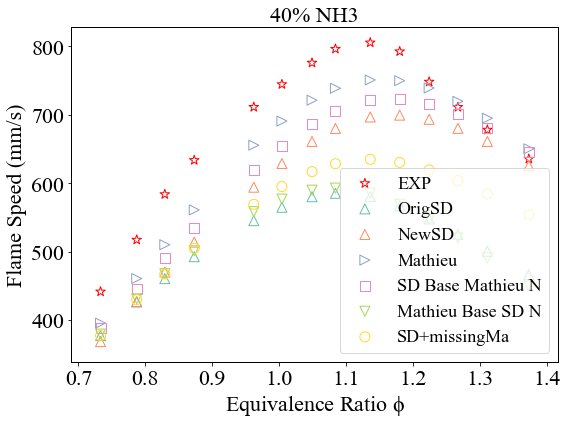

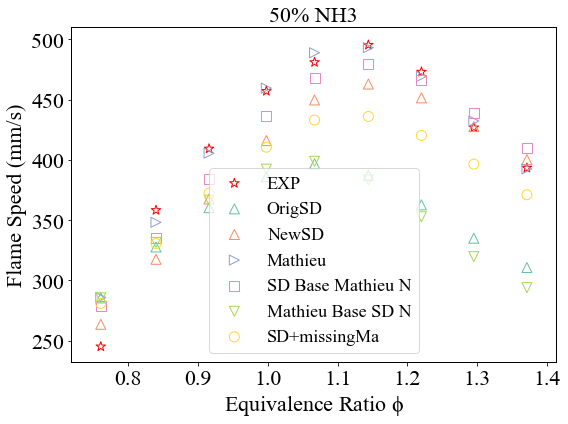

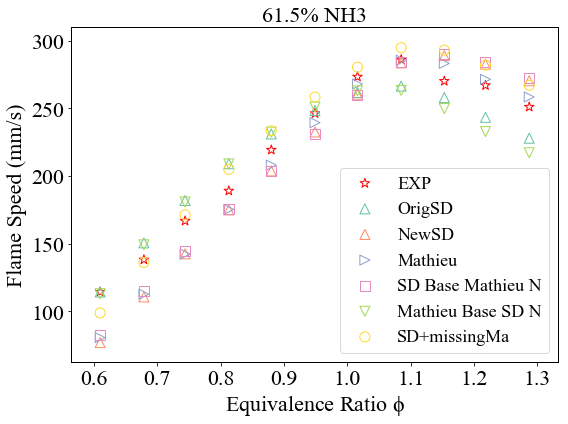

In [8]:
#for loop
title = ['40% NH3','50% NH3','61.5% NH3']
comp = ['NH3:0.4, H2:0.6','NH3:0.5, H2:0.5','NH3:0.615, H2:0.385']
array = np.array([[0.733, 0.787, 0.829, 0.873, 0.962, 1.004, 1.049, 1.084, 1.136, 1.180, 1.224, 1.267, 1.311, 1.373],[0.761, 0.840, 0.916, 0.998, 1.067, 1.144, 1.220, 1.295, 1.371],[0.610, 0.679, 0.744, 0.813, 0.880, 0.949, 1.016, 1.085, 1.153, 1.218, 1.287]])
exp = np.array([[441.689, 517.414, 583.905, 633.773, 711.346, 744.591, 775.989, 796.306, 805.541, 792.612, 748.285, 711.346, 678.100, 635.620],[245.103, 358.314, 409.339, 457.175, 481.093, 495.444, 473.121, 426.879, 393.394],[114.318, 138.182, 166.818, 189.091, 219.318, 246.364, 273.409, 286.136, 270.227, 267.045, 251.136]])
clf=[]
for i in range(3):
    origSD_i = flamesp(array[i],comp[i], '/Users/yuanjie/Dropbox/Premix_NH3/SD_NH3_Mec/MAIN_N.cti')*np.array([1000,]*len(exp[i]))
    newSD_N2H_Lind_i = flamesp(array[i],comp[i], '/Users/yuanjie/Dropbox/Premix_NH3/Mathieu/eliminate_Mathieu/elimHONO/elim_base_sencoef/SD_B_Ma_elimN/SD_Missing_Ma_N/elim4more/N2H_Lindemann_Fall_off/Mathium_mec.cti')*np.array([1000,]*len(exp[i]))
    Ma_i = flamesp(array[i],comp[i],'/Users/yuanjie/Dropbox/Premix_NH3/Mathieu/T_Mathieu.cti')*np.array([1000,]*len(exp[i]))
    SD_b_Ma_N_i = flamesp(array[i],comp[i],'/Users/yuanjie/Dropbox/Premix_NH3/SD_base_Ma_N/Mathium_mec.inp.cti')*np.array([1000,]*len(exp[i]))
    Ma_b_SD_N_i = flamesp(array[i],comp[i],'/Users/yuanjie/Dropbox/Premix_NH3/Mathieu_base_SD_N/mat_b_sd_N/Mat_B_SD_N.cti')*np.array([1000,]*len(exp[i]))    
    SD_missingMa_i = flamesp(array[i],comp[i],'/Users/yuanjie/Dropbox/Premix_NH3/SD_NH3_Mec/combined_Mathieu_missing/comb_mec.cti')*np.array([1000,]*len(exp[i]))    
    
    pltfig(title[i],array[i],exp[i],origSD_i,newSD_N2H_Lind_i,Ma_i,SD_b_Ma_N_i,Ma_b_SD_N_i,SD_missingMa_i)
    #clf.append((newSD_N2H_Lind_i,Ma_i,SD_b_Ma_N_i,newSD_Ma_Missing_N_Elim4more_i))